In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

# Formatting a dataset for classification problems

In [2]:
census = pd.read_csv("census.data",header=None)
census.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
headers_file = open("census.headers")
headers = []
for line in headers_file:
   if len(line.split(':'))>1: # colon indicates line is a column description
       headers.append(line.split(':')[0]) # the column name precedes the colon
headers = headers[15:] # the filter in the if (…) statement above is not 100 percent accurate, need to remove first 15 elements
headers.append('income') # add label for the response variable in the last column
census.columns = headers # set the column names in the dataframe to be extracted names

In [4]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
census.income = census.income.map( lambda x: 0 if x==' <=50K' else 1)    

In [6]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


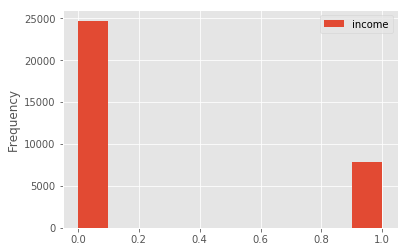

In [7]:
census.plot(kind='hist', y='income')

### Finding object data type in dataset

In [8]:
categorical_features = [e for e,t in enumerate(census.dtypes) if t=='object' ]

In [9]:
categorical_features

[1, 3, 5, 6, 7, 8, 9, 13]

### Mapping of each column from a string to a label from 1 to k, where k is the number of categories

In [10]:
categorical_dicts = []
for c in categorical_features:
    categorical_dicts.append(dict( (i,e) for (e,i) in enumerate(census[headers[c]].unique()) ))

In [11]:
census_categorical = census
for e,c in enumerate(categorical_features):
    census_categorical[headers[c]] = \
    census_categorical[headers[c]].\
    map(categorical_dicts[e].get)

### Use scikit-learn's one-hot encoder to transform these integer values into a series of columns

#### how many categories each of the columns has

In [12]:
n_values = [len(d) for d in categorical_dicts]

In [13]:
n_values

[9, 16, 7, 15, 6, 5, 2, 42]

In [14]:
from sklearn.preprocessing import OneHotEncoder
census_categorical_one_hot = OneHotEncoder(categorical_features=categorical_features, n_values=n_values).fit_transform(census_categorical[headers[:-1]])

In [15]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


### Split data into training and test sets

In [16]:
from scipy import sparse
from sklearn import cross_validation
census_features_train, census_features_test, census_income_train, census_income_test = \
cross_validation.train_test_split(census_categorical_one_hot, \
                                  census_categorical['income'], test_size=0.4, random_state=0)

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Fitting the model

### Stochastic Gradient Descent (SGD)

In [17]:
from sklearn import linear_model
log_model_sgd = linear_model.SGDClassifier(alpha=10,loss='log',penalty='l2',n_iter=1000, fit_intercept=False).fit(census_features_train,census_income_train)

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [18]:
log_model_sgd.coef_

array([[  2.74970290e-05,   1.84925391e-04,  -1.91465255e-03,
          4.17840235e-04,   2.91616061e-04,  -6.73519918e-04,
          7.06829786e-04,  -1.11940421e-05,  -2.00863589e-06,
          2.08312064e-03,  -2.29974482e-03,  -5.88356351e-04,
          1.32714721e-03,  -2.33678533e-04,  -9.77734361e-04,
          3.90131371e-05,  -6.36579520e-05,  -3.33484261e-04,
          3.89084157e-04,   5.97444681e-04,  -1.63900801e-04,
         -4.48437559e-04,  -9.17162128e-05,  -3.17647523e-05,
         -1.76000869e-04,  -5.70615760e-03,   7.62966992e-03,
         -1.75295120e-03,  -1.78280259e-04,  -4.82127723e-04,
          1.05349672e-05,  -4.93354757e-04,  -1.14999559e-03,
          2.38643070e-03,  -6.31250314e-04,   1.82673700e-03,
         -1.74991289e-03,   1.73000479e-04,  -2.11085896e-04,
         -1.84263657e-04,  -3.99071178e-04,  -6.15012866e-04,
          1.87669452e-04,  -6.75528553e-04,   1.57214331e-04,
         -2.48689853e-06,  -8.51107596e-05,  -3.46636620e-03,
        

### Compare these coefficients to the second-order fit we obtain 

In [19]:
log_model_newton = linear_model.LogisticRegression(penalty='l2',solver='lbfgs', fit_intercept=False).fit(census_features_train,census_income_train)

Text(0,0.5,'SGD Coefficient')

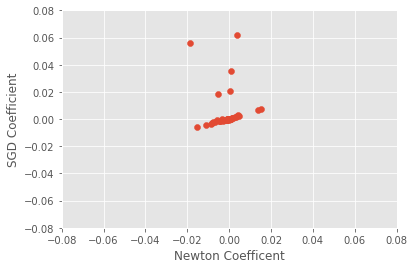

In [20]:
plt.scatter(log_model_newton.coef_,log_model_sgd.coef_)
plt.xlim(-0.08,0.08)
plt.ylim(-0.08,0.08)
plt.xlabel('Newton Coefficent')
plt.ylabel('SGD Coefficient')

In [21]:
train_prediction = log_model_newton.predict_proba(census_features_train)
test_prediction = log_model_newton.predict_proba(census_features_test)

Text(0,0.5,'True Positive Rate')

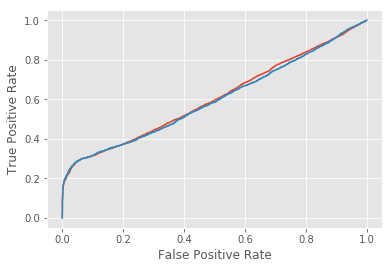

In [22]:
from sklearn import metrics
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(np.array(census_income_train),\
                                                           np.array(train_prediction[:,1]), pos_label=1)
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(np.array(census_income_test),\
                                                        np.array(test_prediction[:,1]), pos_label=1)
plt.plot(fpr_train, tpr_train)
plt.plot(fpr_test, tpr_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [23]:
metrics.auc(fpr_train,tpr_train)

0.60541334794688284

In [24]:
metrics.auc(fpr_test,tpr_test)

0.59890887108922919

In [25]:
expanded_headers = []
non_categorical_headers = []
categorical_index = 0
for e,h in enumerate(np.array(census.columns[:-1])):
    if e in set(categorical_features):
        unsorted_category = np.array([h+key for key in categorical_dicts[categorical_index].keys()])
        category_indices = np.array(list(categorical_dicts[categorical_index].values()))
        expanded_headers+=list(unsorted_category[np.argsort(category_indices)])
        categorical_index+=1
    else:
            non_categorical_headers+=[h]
            expanded_headers+=non_categorical_headers

<BarContainer object of 108 artists>

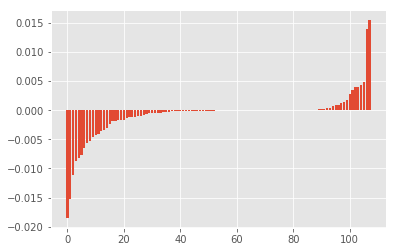

In [26]:
plt.bar(np.arange(108),np.sort(log_model_newton.coef_[0]))

#### looks like the model is only able to learn information from a subet of features

## Separating Nonlinear boundaries with Support vector machines

In [27]:
from sklearn import svm
svm_model = svm.SVC(probability=True, kernel='rbf').fit(census_features_train.toarray(), census_income_train)

In [28]:
train_prediction = svm_model.predict_proba(census_features_train.toarray())
test_prediction = svm_model.predict_proba(census_features_test.toarray())

Text(0,0.5,'True Positive Rate')

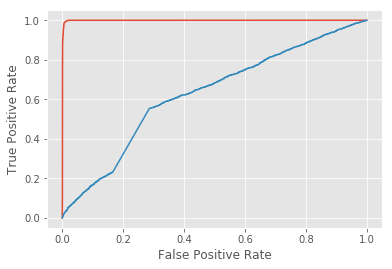

In [29]:
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(np.array(census_income_train),\
                                                           np.array(train_prediction[:,1]), pos_label=1)
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(np.array(census_income_test),\
                                                        np.array(test_prediction[:,1]), pos_label=1)
plt.plot(fpr_train, tpr_train)
plt.plot(fpr_test, tpr_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#### Plotting the ROC curve for the results, we find that we have not improved very much over the logistic regression

#### The red line in the upper left-hand corner of the image is the performance on the training set, while the blue line is the performance on the test set

# Random Forest

#### fitting a model with 200 trees with a maximum depth of 5

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0,\
                                     max_depth=5, random_state=0).fit(census_features_train.toarray(),census_income_train) 

In [31]:
train_prediction = gbm.predict_proba(census_features_train.toarray())
test_prediction = gbm.predict_proba(census_features_test.toarray())

In [33]:
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(np.array(census_income_train),\
                                                           np.array(train_prediction[:,1]), pos_label=1)

In [35]:
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(np.array(census_income_test),\
                                                        np.array(test_prediction[:,1]), pos_label=1)

Text(0,0.5,'True Positive Rate')

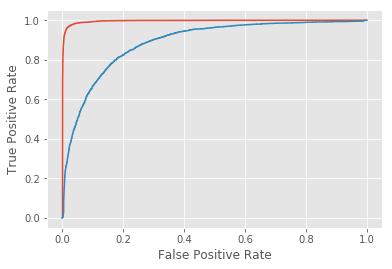

In [36]:
plt.plot(fpr_train, tpr_train)
plt.plot(fpr_test, tpr_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### See a remarkable increase in accuracy on the test set

## Examine the importance of features as determined by the loss in accuracy upon shuffling their values among data points

In [37]:
np.array(expanded_headers)[np.argsort(gbm.feature_importances_)]

array(['native-country Poland', 'native-country Laos',
       'native-country Germany', 'education-num', 'native-country Ecuador',
       'education 5th-6th', 'hours-per-week', 'workclass Without-pay',
       'education-num', 'education Prof-school', 'native-country Jamaica',
       'occupation Transport-moving', 'native-country Philippines',
       'occupation Farming-fishing', 'native-country India',
       'native-country Cambodia', 'native-country Italy',
       'native-country ?', 'workclass Self-emp-inc', 'fnlwgt',
       'native-country England', 'capital-gain', 'native-country Iran',
       'fnlwgt', 'education 7th-8th', 'native-country Thailand',
       'education-num', 'native-country Canada', 'native-country Columbia',
       'native-country Mexico', 'age', 'education Some-college',
       'capital-loss', 'native-country Honduras',
       'race Asian-Pac-Islander', 'capital-gain', 'native-country Cuba',
       'education Assoc-acdm', 'relationship Unmarried', 'capital-loss',